A decision tree is a visual and analytical tool used for decision-making and predictive modeling. It represents decisions and their possible consequences, including outcomes, costs, and utilities. Decision trees are widely used in various fields, including machine learning, business, and statistics, to analyze data and make predictions or guide decision-making.

Key Components of a Decision Tree:

Root Node:

The starting point of the tree.
Represents the entire dataset and a decision or test to split the data.

Branches:

Connect different nodes.
Represent the outcome of a decision or test.

Internal Nodes:

Represent decisions or tests based on attributes.
Divide data into subsets based on criteria (e.g., "Is Age > 30?").

Leaf Nodes:

Represent final outcomes or decisions.
Contain a class label, value, or decision (e.g., "Approved" or "Rejected").

How Decision Trees Work:

Splitting:

The dataset is divided based on feature values using decision rules.
Each split tries to maximize the separation of data into distinct classes or minimize error.

Stopping Criteria:

The tree-building process stops when:
All data in a node belongs to the same class.
A predefined depth is reached.
No significant gain can be achieved from further splits.

Pruning (optional):

Simplifies the tree by removing branches that provide little predictive power.
Reduces overfitting.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"E:\data analysis using python( jupytetr notebooks)\Lawrence Mbura\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].median()

np.float64(28.0)

In [5]:
new_age_var=np.where(df['Age'].isnull,
                     28,
                     df['Age'])
df['Age']=new_age_var

In [6]:
from sklearn import tree
from sklearn import preprocessing

In [7]:
#initialize the label encoder
label_encoder=preprocessing.LabelEncoder()
#convert sex variable to numeric
encoded_sex=label_encoder.fit_transform(df['Sex'])
encoded_sex=encoded_sex.reshape(-1, 1)
#initialize the model
tree_model=tree.DecisionTreeClassifier()
#train the model
tree_model.fit(encoded_sex,df['Survived'])

DecisionTreeClassifier()

In [8]:
pip install dot

Note: you may need to restart the kernel to use updated packages.


In [9]:

pip install dot

Note: you may need to restart the kernel to use updated packages.


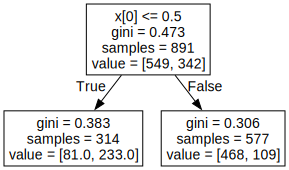

In [10]:
import graphviz
#save tree as dot file
dot_data=tree.export_graphviz(tree_model, out_file=None)
graph=graphviz.Source(dot_data)
graph

In [11]:
#get survival probability
preds=tree_model.predict_proba(X=encoded_sex)

female=preds[df['Sex']=='female'][0][1]
male=preds[df['Sex']=='male'][0][1]

print(female)   #female survival probability
print(male)     #male survival probability

0.7420382165605095
0.18890814558058924


In [12]:
encoded_sex = encoded_sex.flatten()

#create the predictors DataFrame
predictors = pd.DataFrame({
    'encoded_sex': encoded_sex,
    'Pclass': df['Pclass']
})

tree_model.fit(predictors,
               df['Survived'])

DecisionTreeClassifier()

In [13]:
print(encoded_sex.shape)
print(df['Pclass'].shape)

(891,)
(891,)


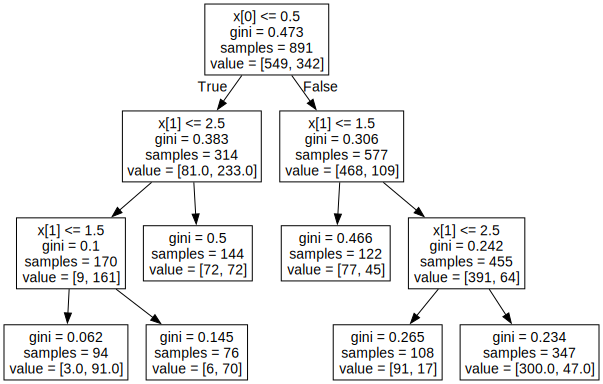

In [14]:
dot_data=tree.export_graphviz(tree_model, out_file=None)
graph=graphviz.Source(dot_data)
graph

In [15]:
#get prediction probabilities
preds=tree_model.predict_proba(X=predictors)
# create a table of prediction by sex and class
pd.crosstab(preds[:,0],columns=[df['Pclass'],
                                df['Sex']])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [16]:
#create the predictors DataFrame
predictors = pd.DataFrame({
    'encoded_sex': encoded_sex,
    'Pclass': df['Pclass'],
    'Age': df['Age'],
    'Fare': df['Fare']
})
#initialize the model with maximum tree depth being 8
tree_model=tree.DecisionTreeClassifier(max_depth=8)
#Train the model
tree_model.fit(predictors,df['Survived'])

DecisionTreeClassifier(max_depth=8)

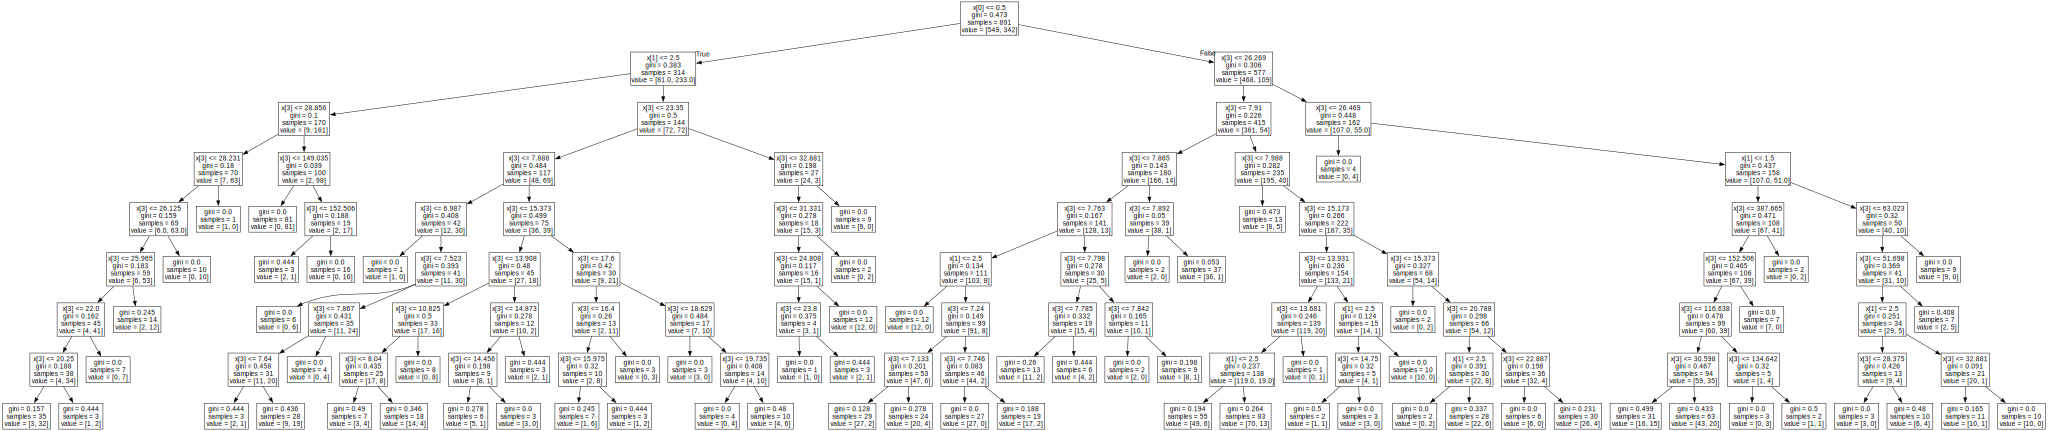

In [17]:
dot_data=tree.export_graphviz(tree_model, out_file=None)
graph=graphviz.Source(dot_data)
graph

In [18]:
#get prediction probabilities
preds=tree_model.predict_proba(X=predictors)
# create a table of prediction by sex and class
pd.crosstab(preds[:,0],columns=[df['Pclass'],
                                df['Sex'],
                                df['Age']])

Pclass        1           2           3     
Sex      female male female male female male
Age        28.0 28.0   28.0 28.0   28.0 28.0
row_0                                       
0.000000     90    9     24    3     27    2
0.085714      0    0     35    0      0    0
0.142857      0    0     14    0      7    0
0.285714      0    0      0    0      0    7
0.321429      0    0      0    0     28    0
0.333333      0    0      3    0      3    0
0.400000      0    0      0    0     10    0
0.428571      0    0      0    0      7    0
0.500000      0    2      0    2      0    0
0.516129      0   31      0    0      0    0
0.600000      0    0      0   10      0    0
0.615385      0    0      0    0      0   13
0.666667      3    0      0    0      9    6
0.682540      0   63      0    0      0    0
0.777778      0    0      0    0     18    0
0.785714      0    0      0    0      0   28
0.833333      0    0      0    0      6   24
0.843373      0    0      0    0      0   83
0.846154      0    0      0    0      0   13
0.866667      0    4      0   18      0    8
0.888889      0    0      0    0      0    9
0.890909      0    0      0   55      0    0
0.894737      0    0      0    0      0   19
0.909091      0    0      0    0      0   11
0.931034      0    0      0    0      0   29
0.972973      0    0      0    0      0   37
1.000000      1   13      0   20     29   58